# Linear Regression with TensorFlow

We use scikit-learn to load and preprocess the Boston housing data.

In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [3]:
# reshape target, as with Keras
y = y.reshape(-1,1)
y.shape

(506, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# some housekeeping
input_dim = X_train.shape[1]
output_dim = 1 # for regression

# store cost during optimization
train_costs = [[], []] 
# 
print_step = 10

### Hyperparameters

In [19]:
learning_rate = 0.025
num_epochs = 100

### Define the computational graph

In [20]:
# placeholders for the data
X = tf.placeholder(tf.float64, name = "X")
y = tf.placeholder(tf.float64, name = "y")

In [21]:
# initialize weights
W = tf.Variable(tf.truncated_normal([input_dim, 1], mean = 0.0, stddev = 1.0, dtype = tf.float64, name = "weights"))
b = tf.Variable(tf.zeros(1, dtype = tf.float64), name = "bias")

In [22]:
W.shape, b.shape

(TensorShape([Dimension(13), Dimension(1)]), TensorShape([Dimension(1)]))

In [23]:
# the model
predictions = tf.add(b, tf.matmul(X, W))  # tf.add with broadcasting

In [24]:
predictions.shape # size of the data is not yet known, but per-data-point dimension is

TensorShape([Dimension(None), Dimension(1)])

In [25]:
# the loss (mean squared error)
loss = tf.reduce_mean(tf.square(y - predictions), name = "loss")

In [26]:
# optimization goal
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
#optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [27]:
# initialization step
init = tf.global_variables_initializer()

### Run the graph

In [28]:
with tf.Session() as sess:

    sess.run(init)
    
    for epoch in range(num_epochs):
        sess.run(optimizer, feed_dict={X: X_train, y: y_train})
        current_cost = sess.run(loss, feed_dict={X: X_train, y: y_train})
        
        # store the costs during training epoch-wise
        train_costs[0].append(epoch)
        train_costs[1].append(current_cost)
        if epoch % print_step == 0:
            print("Epoch:", '%04d' % (epoch), "cost =", "{:.4f}".format(current_cost))
     
    #################### after training ##########################
    
    # store predictions on training set
    pred_train = sess.run(predictions, feed_dict={X: X_train})
    train_cost = sess.run(loss, feed_dict={X: X_train, y: y_train}) 
    
    # print final training cost
    print("\nTraining cost: ", "{:.4f}".format(train_cost))
    
    # get weights and bias (intercept)
    print("\nW= ", sess.run(W))
    print("\nb= ", sess.run(b))
        
    # store predictions on test set
    pred_test = sess.run(predictions, feed_dict={X: X_test})
    test_cost = sess.run(loss, feed_dict={X: X_test, y: y_test})  
    print("\nTest cost: ", "{:.4f}".format(test_cost))
 

Epoch: 0000 cost = 554.4585
Epoch: 0010 cost = 193.8662
Epoch: 0020 cost = 83.0098
Epoch: 0030 cost = 43.3355
Epoch: 0040 cost = 28.9980
Epoch: 0050 cost = 23.7240
Epoch: 0060 cost = 21.7122
Epoch: 0070 cost = 20.8872
Epoch: 0080 cost = 20.5032
Epoch: 0090 cost = 20.2905

Training cost:  20.1622

W=  [[-0.62902461]
 [ 0.85351437]
 [-0.41788597]
 [ 0.70640613]
 [-0.37803676]
 [ 2.92857597]
 [-0.53027533]
 [-2.21676004]
 [ 0.30489465]
 [-0.73583223]
 [-1.86863956]
 [ 0.70506966]
 [-3.52413498]]

b=  [ 22.4780069]

Test cost:  36.5318


### Visualize training costs

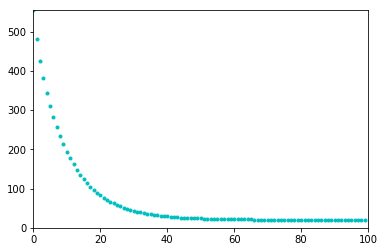

In [29]:
plt.plot(train_costs[0], train_costs[1], 'c.')
plt.axis([0, num_epochs, 0, max(train_costs[1])])
plt.show()   

### Get predictions

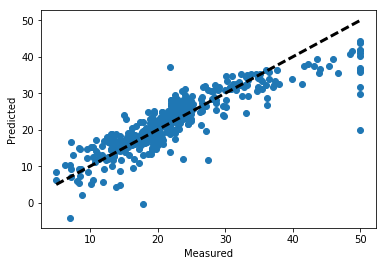

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

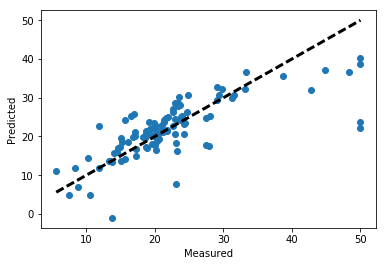

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()